In [3]:
import random
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import multivariate_normal
from tqdm import trange, tqdm
from State_Space_Model import Stochastic_AD_System

import scipy.sparse as sp
import scipy.sparse.linalg as spla

import warnings
warnings.filterwarnings("ignore")

In [7]:
######################################
########## dataset parameters ########
######################################
# Parameters
L = 1.0               # Length of the domain
T = 10.0             # Total simulation time
k = 1               # advection coefficient
D = 0.1               # Diffusion coefficient

Nx = 100               # Number of spatial grid points
Nt = 200             # Number of time steps
params_dict = {"L": L, "T": T, "D": D, "k": k, "Nx": Nx, "Nt": Nt}

sigma = 10
obs_type = "PN"
N_s = 10
N_train = 1000
N_test = 200

dataFolderName = './Data/'
# if obs_type == "PN":
#     dataFileName = 'SAD_s={:.1f}_m={}_T={}_obs={}.npy'.format(sigma, r2, Nx, Nt, obs_type, len(sensor_index))
# else:
dataFileName = 'SAD_s={:.1f}_m={}_T={}.npy'.format(sigma, Nx, Nt)
data_filename = dataFolderName + dataFileName

if not os.path.exists('./Data'):
    os.mkdir('./Data')    
   
SAD = Stochastic_AD_System(params_dict, sigma, obs_type, sensor_index)

In [8]:
#########################################    
########### Generate State Data #########    
#########################################  
if not os.path.exists(data_filename):
    x_train, x_test = SAD.generate_state_sample(N_train, N_test)
    np.save(data_filename, np.array([x_train, x_test], dtype=object))
else:
    print("Load prepared data...")
    x_train, x_test = np.load(data_filename, allow_pickle=True)

Load prepared data...


In [15]:
#######################################
############# Hyparams setting ########
#######################################
r2 = 0.25
N_s = 10  # number of sensors

# OBSERVATION NOISE
obs_noise_trn = np.sqrt(r2) * np.random.randn(N_train, Nt, Nx)
obs_noise_test = np.sqrt(r2) * np.random.randn(N_test, Nt, Nx)

np.savez('./Data/obs_noise_r2={}.npz'.format(r2), train=obs_noise_trn, test=obs_noise_test)

In [10]:
# print("Number of sensors:", N_s)
if N_s == 20:
    sensor_index = np.arange(2, Nx, 5)
elif N_s == 15:
    sensor_index = np.arange(0, Nx, 7)
elif N_s == 10:
    sensor_index = np.arange(5, Nx, 10)
elif N_s == 25:
    sensor_index = np.arange(0, Nx, 4)

# print("Sensor configuartion:")
# print(sensor_index)

#########################################
########### Generate Obs Data ###########
#########################################
obs_noise = np.load('./Data/obs_noise_r2={}.npz'.format(r2))
obs_noise_trn = obs_noise['train']
obs_noise_test = obs_noise['test']

y_train = SAD.h(x_train, SAD.obs_type)[..., sensor_index] + obs_noise_trn[..., sensor_index]
y_test = SAD.h(x_test, SAD.obs_type)[..., sensor_index] + obs_noise_test[..., sensor_index]

In [5]:
# os.remove(data_filename)

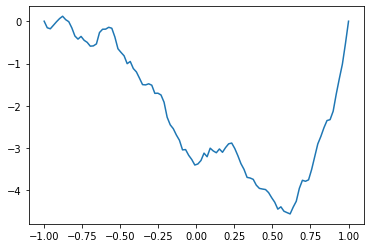

In [14]:
u = x_test[0, -1]
plt.plot(SAD.x, u)